<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/Etv2_Late_peaks_overlapped_between_EBs_and_MEFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook looks at the overlap between late Etv2 peaks in MEFs and EBs, and between genes near Etv2 peaks

In [2]:
start_time0 <- Sys.time()

In [3]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [4]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Comparing the late Etv2 binding events between MEF and EB

In [5]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
required_packages <- c(
  'devtools', 'gplots', 'circlize', 'dplyr',
  'SummarizedExperiment', 'BSgenome.Mmusculus.UCSC.mm10', 'BiocParallel',
  'rtracklayer', 'EnrichedHeatmap', 'ChIPpeakAnno', 'ChIPseeker', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'ComplexHeatmap',
  'org.Mm.eg.db', 'clusterProfiler', 'ReactomePA', ('VennDiagram')
  'gsl', 'DirichletMultinomial', 'chromVAR', 'motifmatchr' # chromVAR related packages
)
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BiocVersion', 'gplots', 'circlize',
  'SummarizedExperiment', 'BSgenome.Mmusculus.UCSC.mm10', 'BiocParallel',
  'rtracklayer', 'EnrichedHeatmap', 'ChIPpeakAnno', 'ChIPseeker',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'ComplexHeatmap', 'org.Mm.eg.db',
  'clusterProfiler', 'ReactomePA', 'gsl', 'DirichletMultinomial', 'chromVAR',
  'motifmatchr'

also installing the dependencies ‘gridGraphics’, ‘pracma’, ‘R.oo’, ‘R.methodsS3’, ‘formatR’, ‘plogr’, ‘filelock’, ‘ggfun’, ‘ggplotify’, ‘patchwork’, ‘ape’, ‘tidytree’, ‘treeio’, ‘gridExtra’, ‘fastmatch’, ‘tweenr’, ‘polyclip’, ‘poweRlaw’, ‘annotate’, ‘R.utils’, ‘sass’, ‘bitops’, ‘GenomeInfoDbData’, ‘lambda.r’, ‘futile.options’, ‘Rhtslib’, ‘rjson’, ‘RSQLite’, ‘AnnotationFilter’, ‘ProtGenerics’, ‘Bi

In [7]:
library(GenomicRanges)
library(ChIPpeakAnno)
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(BSgenome.Mmusculus.UCSC.mm10)
library(org.Mm.eg.db)
library(clusterProfiler)
library(gplots)
library(dplyr)
library(EnrichedHeatmap)
library(circlize)
library(VennDiagram)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb



ChIPseeker v1.30.2  For help: https://guangchuangyu.github.io/software/ChIPseeker

If you use ChIPseeker in published res

# Reading EB and MEF Etv2 peaks 

In [45]:
all_etv2_peaks_url <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/all_Etv2_peaks.rds'
gr <- readRDS(gzcon(url(all_etv2_peaks_url)))
gr
colnames(gr$group)

GRanges object with 162010 ranges and 4 metadata columns:
           seqnames            ranges strand |                peak_id     score
              <Rle>         <IRanges>  <Rle> |            <character> <numeric>
       [1]     chr1   3037784-3037983      * | /panfs/roc/scratch/g..  16.22768
       [2]     chr1   3263790-3263989      * | /panfs/roc/scratch/g..   8.36521
       [3]     chr1   3344682-3344881      * | /panfs/roc/scratch/g..   9.73217
       [4]     chr1   3460640-3460839      * | /panfs/roc/scratch/g..   3.92081
       [5]     chr1   3490314-3490513      * | /panfs/roc/scratch/g..  12.29730
       ...      ...               ...    ... .                    ...       ...
  [162006]     chrY 90828936-90829135      * | /panfs/roc/scratch/g.. 160.15463
  [162007]     chrY 90836259-90836458      * | /panfs/roc/scratch/g..   8.27339
  [162008]     chrY 90841624-90841823      * | /panfs/roc/scratch/g..   1.53792
  [162009]     chrY 90842563-90842762      * | /panfs/roc/scra

[1] "MEF_Dox_d1_Etv2" "MEF_Dox_d2_Etv2" "MEF_Dox_d7_Etv2" "EB_Dox_3h_Etv2" 
[5] "EB_Dox_12h_Etv2"

# Extracting Etv2 peaks for 12H EB and D7 MEFs to visualize overlap between them 

In [48]:
peaks_EB <- gr[gr$group[, 'EB_Dox_12h_Etv2']]

In [51]:
peaks_MEF <- gr[gr$group[, 'MEF_Dox_d7_Etv2']]

# Looking at the overlap of Etv2 peaks between EBs and MEFs

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'VennDiagram'"
Old packages: 'backports', 'brio', 'cpp11', 'credentials', 'devtools',
  'digest', 'fs', 'glue', 'memoise', 'openssl', 'pkgbuild', 'pkgload', 'readr',
  'remotes', 'stringi', 'vroom', 'withr', 'xml2', 'nlme'

Loading required package: futile.logger



(polygon[GRID.polygon.47], polygon[GRID.polygon.48], polygon[GRID.polygon.49], polygon[GRID.polygon.50], text[GRID.text.51], text[GRID.text.52], text[GRID.text.53], text[GRID.text.54], text[GRID.text.55]) 

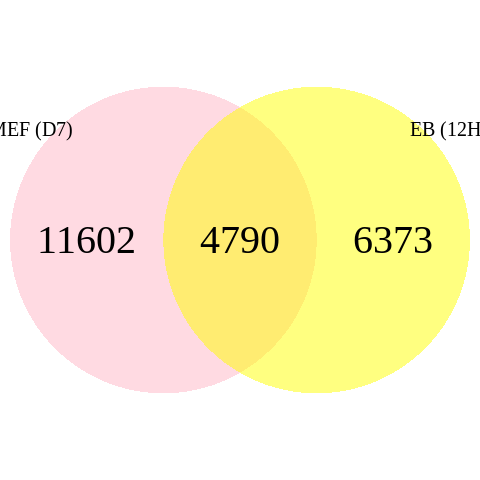

In [101]:
options(repr.plot.width=4, repr.plot.height=4)
draw.pairwise.venn(
  area1 = length(peaks_EB),
  area2 = length(peaks_MEF), 
  cross.area = length(findOverlaps(peaks_EB, peaks_MEF)),
  category = c("EB (12H)", 'MEF (D7)'), 
  lty = "blank", 
  fill = c("yellow1", "pink1"),
  scaled = FALSE,
  cex = 2,
  cat.cex = 1
)



# Annotate late EB and MEF Etv2 peaks and looking at the overlap between the genes near Etv2 peaks

In [92]:
bed_files <- c(
  'MEF_Dox_d1_Etv2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d1_Etv2_summits.bed',
  'EB_Dox_3h_Etv2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_Dox_3h_Etv2_summits.bed'
)
gr_list <- lapply(1:length(bed_files), function(i){
  x <-read.table(bed_files[i], header = FALSE, sep = '\t')
  gr <- GRanges(seqnames = x[, 1], range = IRanges(x[, 2], x[, 3]), score = x[, 5])
  names(gr) <- x[, 4]
  gr
})
names(gr_list) <- names(bed_files)

In [70]:
peaks <- list(peaks_EB, peaks_MEF)

In [72]:
names(peaks) <- c('EB','MEF')

In [102]:
set.seed(2345)
anno_list <- lapply(peaks, function(p)
  annotatePeak(p, tssRegion = c(-5000, 1000), TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene, annoDb = "org.Mm.eg.db")
)

>> preparing features information...		 2021-12-04 01:03:15 AM 
>> identifying nearest features...		 2021-12-04 01:03:15 AM 
>> calculating distance from peak to TSS...	 2021-12-04 01:03:16 AM 
>> assigning genomic annotation...		 2021-12-04 01:03:16 AM 
>> adding gene annotation...			 2021-12-04 01:03:21 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-12-04 01:03:21 AM 
>> done...					 2021-12-04 01:03:21 AM 
>> preparing features information...		 2021-12-04 01:03:21 AM 
>> identifying nearest features...		 2021-12-04 01:03:21 AM 
>> calculating distance from peak to TSS...	 2021-12-04 01:03:22 AM 
>> assigning genomic annotation...		 2021-12-04 01:03:22 AM 
>> adding gene annotation...			 2021-12-04 01:03:24 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-12-04 01:03:24 AM 
>> done...					 2021-12-04 01:03:24 AM 


In [103]:
anno_dat <- lapply(anno_list, function(d){as.data.frame(d)})

(polygon[GRID.polygon.74], polygon[GRID.polygon.75], polygon[GRID.polygon.76], polygon[GRID.polygon.77], text[GRID.text.78], text[GRID.text.79], text[GRID.text.80], text[GRID.text.81], text[GRID.text.82]) 

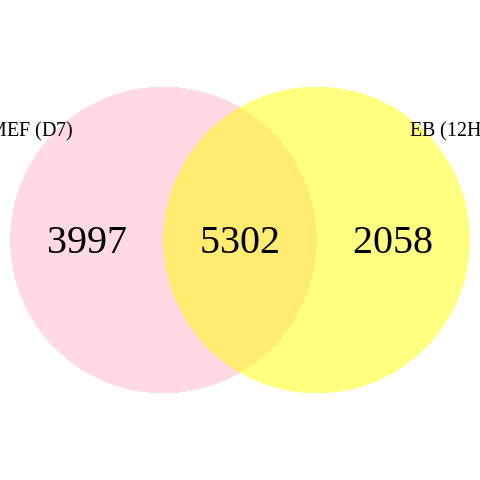

In [107]:
options(repr.plot.width=4, repr.plot.height=4)
draw.pairwise.venn(
  area1 = length(unique(anno_dat$EB$SYMBOL)),
  area2 = length(unique(anno_dat$MEF$SYMBOL)), 
  cross.area = length(intersect(unique(anno_dat$MEF$SYMBOL), unique(anno_dat$EB$SYMBOL))),
  category = c("EB (12H)", 'MEF (D7)'), 
  lty = "blank", 
  fill = c("yellow1", "pink1"),
  scaled = FALSE,
  cex = 2,
  cat.cex = 1
)

We have a significant overlap between late Etv2 peaks in EBs and MEFs, and the genes near these peaks.

In [108]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] VennDiagram_1.7.1                        
 [2] futile.logger_1.4.3                      
 [3] circlize_0.4.13                          
 [4] EnrichedHeatmap_1.24.0                   
 [5] ComplexHeatmap_2.10.0                    
 [6] dplyr_